In [ ]:

##Final project


"""
Plans:

# Data Preprocessing

  - Uploading 
  - Standardizing
  - Spliting data 

# Data Analysis/Exploration
  - Feature selection - forward feature selection
  - Graph - Correlation plot etc, 
  - Stats of data 

# Modeling
 - Logistic regression
 - Gradient Boosting
 - Random Forests

# Evaluation of results
  - Cross validation for @ model
  - Metric comparison for @ model



"""

'\nPlans:\n\n# Data Preprocessing\n\n  - Uploading \n  - Standardizing\n  - Spliting data \n\n# Data Analysis/Exploration\n  - Feature selection - forward feature selection\n  - Graph - Correlation plot etc, \n  - Stats of data \n\n# Modeling\n - Logistic regression\n - Gradient Boosting\n - Random Forests\n\n# Evaluation of results\n  - Cross validation for @ model\n  - Metric comparison for @ model\n\n\n\n'

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, auc, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [ ]:
# Data load and preliminary data info
#data = pd.read_csv('/content/drive/MyDrive/DS5220/diabetes.csv')
data = pd.read_csv("diabetes.csv")
diabetes_df = data.copy()
diabetes_df.info()
diabetes_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


Dataset contains 8 numerical independent variables / features and a binary classification dependent variable.

In [ ]:
# Summary Stats
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


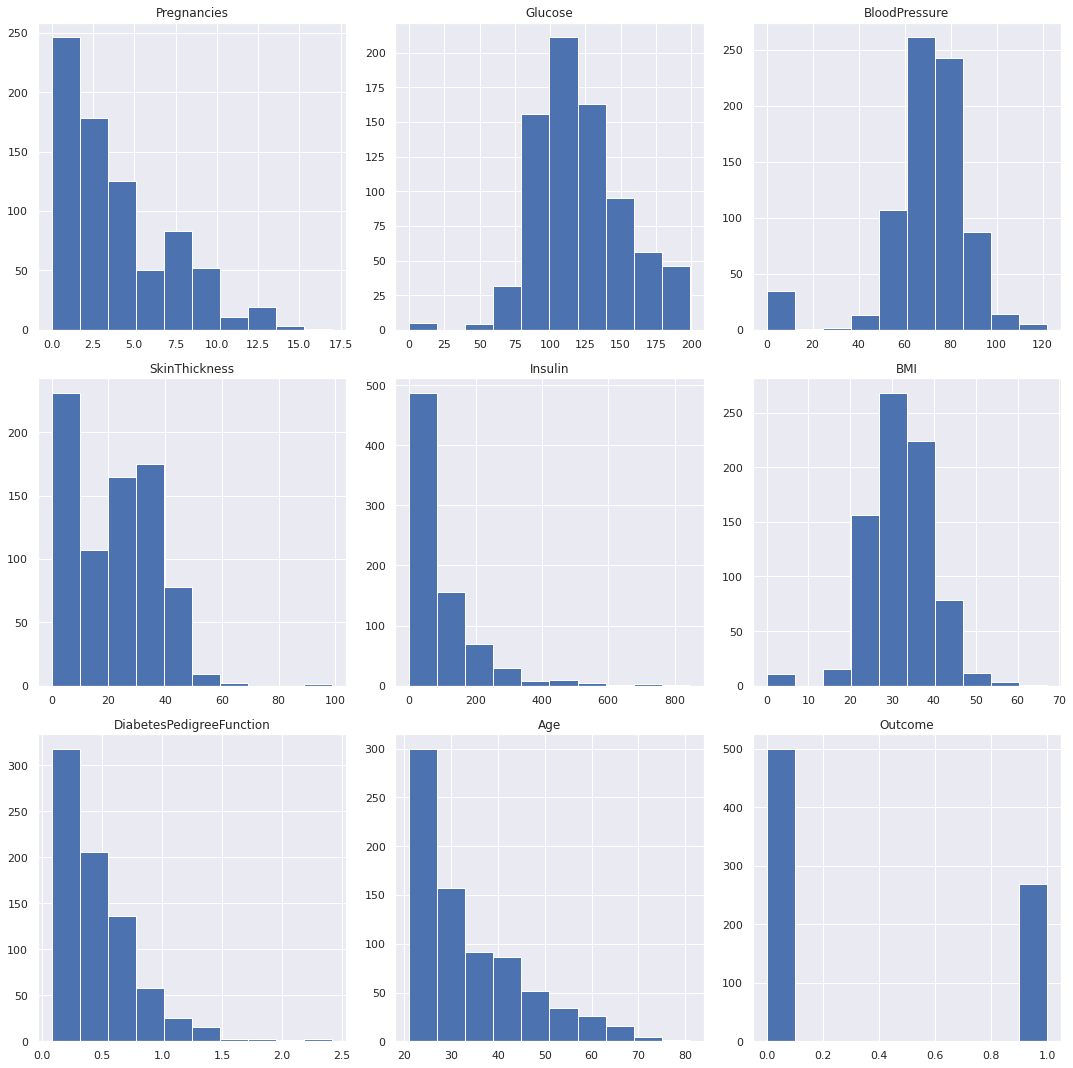

In [ ]:
# Histograms of the variables
diabetes_df.hist(figsize=(15,15)) 
plt.tight_layout()
plt.show()

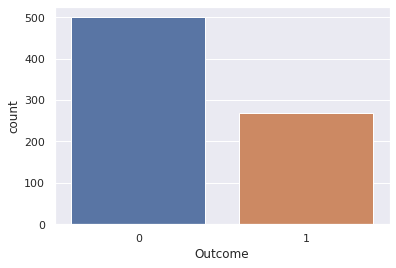

In [ ]:
sns.countplot(x=diabetes_df['Outcome'])

In [ ]:
# Imbalanced data should be 10:1 ratio but with a small dataset 2:1 ratio is significant
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# Correlation table 
corr_table = diabetes_df.corr()
corr_table.style.background_gradient(cmap='viridis')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Glucose has the highest correlation to the Outcome followed by BMI, Age and Pregnancies. All features are positively correlated to the Outcome / target feature. 

In [ ]:
features = diabetes_df.columns
features = features.tolist()
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

Dataset contains more observations without diabetes. 

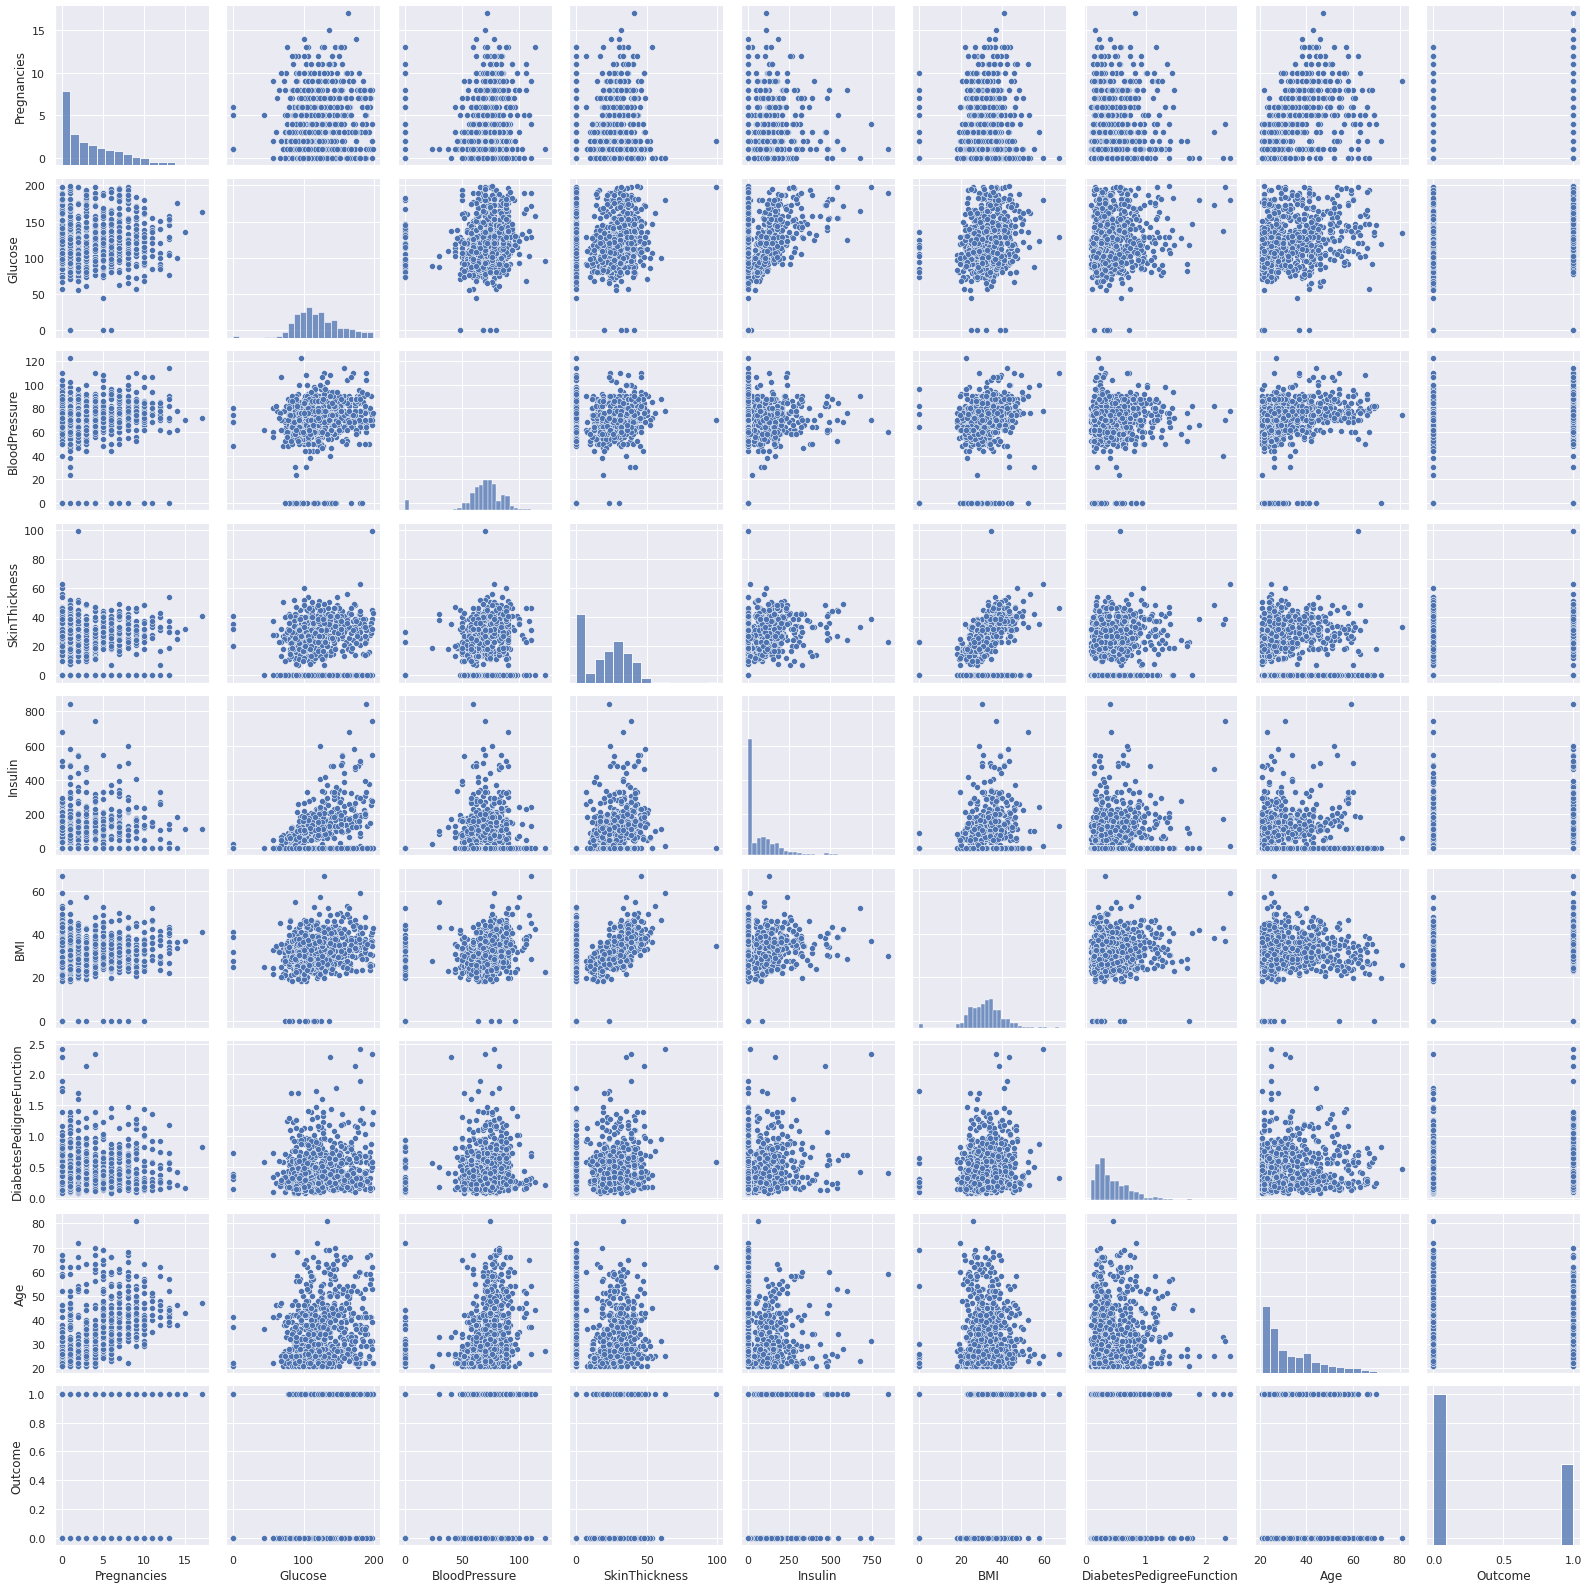

In [ ]:
sns.pairplot(diabetes_df[features], height = 2.5)
plt.show()



*   Women that have had high number of pregnancies tend to be diabetic. 
*   Women with low blood sugar tend to be non-diabetic. 
*   Women with low blood pressure tend to be non-diabetic.
*   No clear relationship between SkinThickness and the Outcome
*   Women with high levels of Insulin tend to be diabetic.
*   Women with high BMI tend to diabetic.
*   No clear relationship between DiabetesPedigreeFunction and the Outcome.
*   Older women tend to be diabetic.



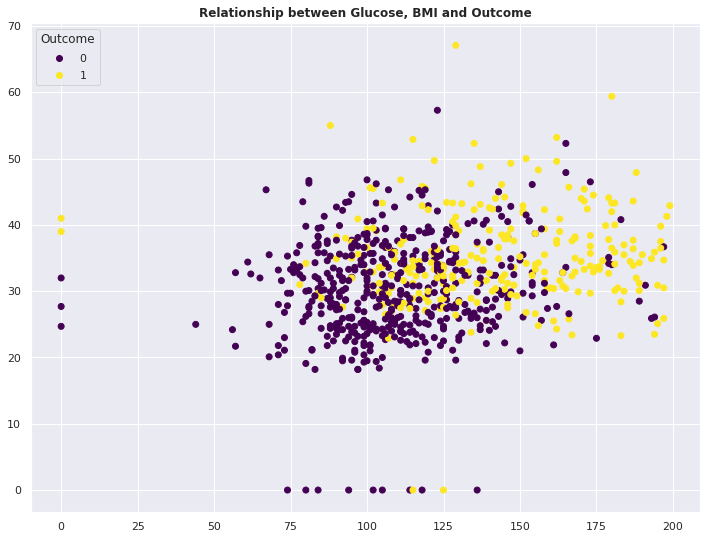

In [ ]:
plt.figure(figsize=(12,9))
scatter = plt.scatter(x=diabetes_df['Glucose'], y=diabetes_df['BMI'], c = diabetes_df['Outcome'], cmap='viridis')
plt.legend(*scatter.legend_elements(), loc = "upper left", title = 'Outcome')
plt.title("Relationship between Glucose, BMI and Outcome", weight='bold')
plt.show()

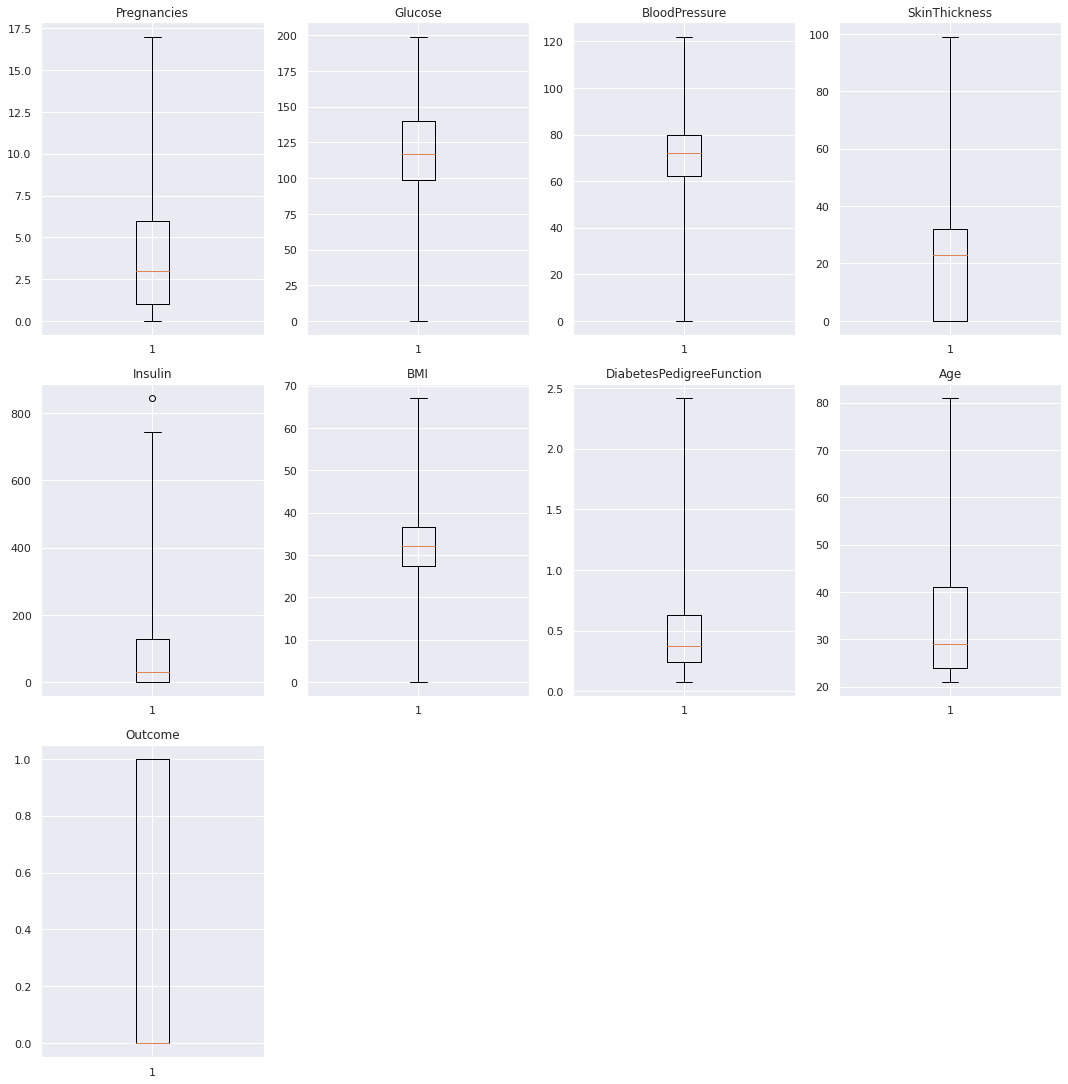

In [ ]:
# boxplots to visualize the outliers in a dataset
i = 1
plt.figure(figsize=(15,30))
for var in features: #plotting boxplot for each variable
   plt.subplot(round(len(features),0)/3+3,4,i)
   plt.boxplot(diabetes_df[var], whis=5)
   plt.title(var)
   i+=1
plt.tight_layout()
plt.show()

No outliers in the dataset

# Data Preprocessing

In [ ]:
# Declare X(independent) and y(dependent) variables 
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# Taking care of missing data(Zeros) in columns below :- 
# Glucose - 5 observations with 0 reading (0.7% of the observations)
# BloodPressure - 35 observations with 0 reading (5% of the observations)
# SkinThickness - 227 observations with 0 reading (30% of the observations) 
# Insulin - 374 observations with 0 reading, (49% of the observations)
# BMI - 11 observations with 0 reading (1.4 % of the observations)
imp_mean = SimpleImputer(missing_values=0, strategy='mean')
imp_mean.fit(X.iloc[:, 1:6])
X.iloc[:, 1:6] = imp_mean.transform(X.iloc[:, 1:6])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


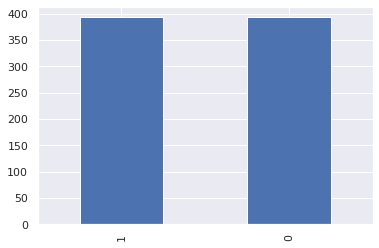

In [ ]:
from pandas.core.common import random_state
# Splitting dataset into training and test sets
seed = 0 
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)
#X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.20, random_state=seed)

# Feature Scaling by Standardization 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

# Dealing with imbalance in the dataset 
smote = SMOTE(random_state=seed)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts().plot.bar()

# Feature Selection

In [ ]:
# feature selection using best subset selection using logistic regression

features = X.columns
print(features)

import statsmodels.api as sm
from itertools import combinations
## do logistic regressio for each feature_set selected 
def processSubset(feature_set):
    x= X_train[list(feature_set)]
    x = sm.add_constant(x)
    regr = sm.OLS(y_train,x).fit()
    aic = regr.aic
    bic = regr.bic
    RSS_adj = regr.rsquared_adj
    param = regr.params
    print(aic, bic, RSS_adj)
    return {"model":regr, "param": param, "rss_adj":RSS_adj, "aic": aic, "bic": bic, "subset_size": len(list(feature_set)), "subset": list(feature_set)}

subsets_df = []
subsetsList = []
index = np.arange(1,8)


## get combo of subsets 
for i in index:
  subsets_i = combinations(features, i)
  #print(list(subsets_i))
  subset = []
  subsetsList.append(list(subsets_i))
#print(subsetsList[2])

sets_df =  pd.DataFrame();
nums = []
k= np.arange(1,8)
def getInfoForK(k):  #k range from 1-3
  subsets = subsetsList[k-1]
  aics = []
  bics = []
  rss_adjs = []
  models = []
  params= []
  for s in subsets:
    num = processSubset(s)
    nums.append(num)
    aics.append(num['aic'])
    bics.append(num['bic'])
    rss_adjs.append(num['rss_adj'])
    models.append(num['model'])
    params.append(num['param'])
  #print(aics)
  #print(bics)
  return{"aics": aics, "bics": bics, "rss_adjs": rss_adjs, "models": models, "subset_val": k, "subset": s}


### save info for size k and then put them into a list
subsets_infos = []
for i in index:
  results = getInfoForK(i);
  subsets_infos.append(results);
print(subsets_infos[2])

subset_df = pd.DataFrame(subsets_infos)
print(subset_df.head())

nums_df = pd.DataFrame(nums)
display(nums_df)

In [ ]:
best = []


best_rssa = nums_df[ nums_df.rss_adj == nums_df.rss_adj.min()]
print("best rss_a",best_rssa['subset'],best_rssa["param"])

for i in np.arange(1,8):
  df1 =  nums_df[ nums_df.subset_size == i] 
  best_aic_3 = df1[ df1.rss_adj == df1.rss_adj.min()] 
  print("best aic",  best_aic_3['subset'], best_aic_3["param"])
  best.append(best_aic_3)


best rss_a 2    [BloodPressure]
Name: subset, dtype: object 2    const           -0.010703
BloodPressure    0.0...
Name: param, dtype: object
best aic 2    [BloodPressure]
Name: subset, dtype: object 2    const           -0.010703
BloodPressure    0.0...
Name: param, dtype: object
best aic 9    [Pregnancies, BloodPressure]
Name: subset, dtype: object 9    const           -0.007751
Pregnancies      0.0...
Name: param, dtype: object
best aic 46    [Pregnancies, BloodPressure, Age]
Name: subset, dtype: object 46    const           -0.077221
Pregnancies      0.0...
Name: param, dtype: object
best aic 110    [Pregnancies, BloodPressure, SkinThickness, Age]
Name: subset, dtype: object 110    const           -0.274946
Pregnancies      0.0...
Name: param, dtype: object
best aic 187    [Pregnancies, BloodPressure, SkinThickness, Di...
Name: subset, dtype: object 187    const                      -0.367978
Pregnanci...
Name: param, dtype: object
best aic 235    [Pregnancies, BloodPressure, SkinT

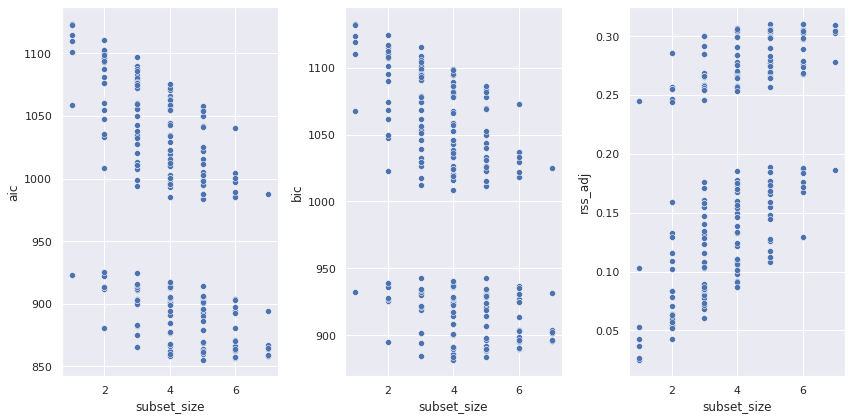

In [ ]:
### select best for each k, and plot here 

#aics 
import matplotlib.pyplot as plt
import seaborn as sns

aics = nums_df["aic"]
bics = nums_df["bic"]
rss_adjs = nums_df["rss_adj"]
size = nums_df["subset_size"]

fig, axes = plt.subplots(1, 3, squeeze=False, figsize=(12, 6))
sns.scatterplot(data=nums_df, x='subset_size', y='aic', ax=axes[0, 0])
sns.scatterplot(data=nums_df, x='subset_size', y='bic', ax=axes[0, 1])
sns.scatterplot(data=nums_df, x='subset_size', y='rss_adj', ax=axes[0, 2])

plt.tight_layout()

### from the graph here, lowest for aic is size 5, lowerst for bic is size 4, lowest fr rss_adj is size 1


In [ ]:

df1 =  nums_df[ nums_df.subset_size == 5] 
best_aic_3 = df1[ df1.rss_adj == df1.rss_adj.min()] 
display(best_aic_3)
print( best_aic_3['subset'], best_aic_3["param"])
best.append(best_aic_3)
features5 = ["Pregnancies","BloodPressure","SkinThickness","DiabetesPedigreeFunction","Age"]
new_x_train = X_train1[features5]
new_x_test = X_test1[features5]
display(new_x_train.head())
display(new_x_test)
  ## best subset is Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age
  ## best parameter DiabetesLedigreeFunction,  pregnancy, SkinThickness, Age, BloodPressure 

,model,param,rss_adj,aic,bic,subset_size,subset
187,<statsmodels.regression.linear_model.Regressio...,const -0.367978 Pregnanci...,0.108049,1058.047364,1086.049105,5,"[Pregnancies, BloodPressure, SkinThickness, Di..."


187    [Pregnancies, BloodPressure, SkinThickness, Di...
Name: subset, dtype: object 187    const                      -0.367978
Pregnanci...
Name: param, dtype: object


,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age
603,7,78.000000,29.00000,0.692,54
118,4,60.000000,23.00000,0.443,22
247,0,90.000000,33.00000,0.427,23
157,1,56.000000,21.00000,0.833,23
468,8,72.405184,29.15342,0.183,38


,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age
661,1,76.0,43.00000,1.394,22
122,2,74.0,30.00000,0.404,23
113,4,62.0,29.15342,0.391,25
14,5,72.0,19.00000,0.587,51
529,0,65.0,29.15342,0.660,31
...,...,...,...,...,...
476,2,80.0,45.00000,0.711,29
482,4,58.0,22.00000,0.306,28
230,4,86.0,29.15342,0.645,22
527,3,74.0,15.00000,0.107,24


# Modeling

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(random_state=seed)
log_reg.fit(X_train, y_train)
log_reg_y_pred = log_reg.predict(X_test)

log_reg_accuracy_score = accuracy_score(y_test, log_reg_y_pred)
log_reg_roc_auc_score = roc_auc_score(log_reg_y_pred, y_test)
log_reg_confusion_matrix = confusion_matrix(y_test, log_reg_y_pred)
log_reg_precision_score = precision_score(y_test, log_reg_y_pred)
log_reg_recall_score = recall_score(y_test, log_reg_y_pred) 
log_reg_f1_score = f1_score(y_test, log_reg_y_pred)

print("Logistic Regression Model Accuracy Score is: {:.3f}".format(log_reg_accuracy_score))
print("Logistic Regression Model Confusion Matrix: ", log_reg_confusion_matrix)
print("Logistic Regression Model Precision Score: {:.3f}".format(log_reg_precision_score))
print("Logistic Regression Model Recall Score: {:.3f}".format(log_reg_recall_score))
print("Logistic Regression Model F1 Score: {:.3f}".format(log_reg_f1_score))
print("Logistic Regression Model ROC AUC Score: {:.3f}".format(log_reg_roc_auc_score))


Logistic Regression Model Accuracy Score is: 0.747
Logistic Regression Model Confusion Matrix:  [[82 25]
 [14 33]]
Logistic Regression Model Precision Score: 0.569
Logistic Regression Model Recall Score: 0.702
Logistic Regression Model F1 Score: 0.629
Logistic Regression Model ROC AUC Score: 0.712


In [ ]:
# Logistic Regression Grid Search
grid = {
    'penalty': ['l1', 'l2'], 
    'C': np.logspace(-4, 4, 20), 
    'solver' : ['liblinear']
}

log_reg1 = LogisticRegression(random_state=seed)
log_reg_cv = GridSearchCV(log_reg1, grid, cv = 10, verbose=True, scoring='accuracy')
log_reg_cv.fit(X_train, y_train)

print("Logistic Regression Grid Search Best parameters:", log_reg_cv.best_params_)
print("Logistic Regression Grid Search Best Training Score: {:.3f}".format(log_reg_cv.best_score_))
print("Logistic Regression Grid Search Best Test score: {:.3f}".format(log_reg_cv.score(X_test, y_test)))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Logistic Regression Grid Search Best parameters: {'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Grid Search Best Training Score: 0.749
Logistic Regression Grid Search Best Test score: 0.760


In [ ]:
# Gradient Boosting Classifier
gb_cls = GradientBoostingClassifier(random_state=seed)
gb_cls.fit(X_train, y_train)
gb_cls_y_pred = gb_cls.predict(X_test)

gb_cls_accuracy_score = accuracy_score(y_test, gb_cls_y_pred)
gb_cls_roc_auc_score = roc_auc_score(gb_cls_y_pred, y_test)
gb_cls_confusion_matrix = confusion_matrix(y_test, gb_cls_y_pred)
gb_cls_precision_score = precision_score(y_test, gb_cls_y_pred)
gb_cls_recall_score = recall_score(y_test, gb_cls_y_pred) 
gb_cls_f1_score = f1_score(y_test, gb_cls_y_pred)

print("Gradient Boosting Classifier Model Accuracy Score is: {:.3f} ".format(gb_cls_accuracy_score))
print("Gradient Boosting Classifier Model Confusion Matrix: ", gb_cls_confusion_matrix)
print("Gradient Boosting Classifier Model Precision Score: {:.3f}".format(gb_cls_precision_score))
print("Gradient Boosting Classifier Model Recall Score: {:.3f}".format(gb_cls_recall_score))
print("Gradient Boosting Classifier Model F1 Score: {:.3f}".format(gb_cls_f1_score))
print("Gradient Boosting Classifier Model ROC AUC Score: {:.3f} ".format(gb_cls_roc_auc_score))

Gradient Boosting Classifier Model Accuracy Score is: 0.779 
Gradient Boosting Classifier Model Confusion Matrix:  [[82 25]
 [ 9 38]]
Gradient Boosting Classifier Model Precision Score: 0.603
Gradient Boosting Classifier Model Recall Score: 0.809
Gradient Boosting Classifier Model F1 Score: 0.691
Gradient Boosting Classifier Model ROC AUC Score: 0.752 


In [ ]:
# Gradient Boosting Classifier Grid Search
grid = {
    'learning_rate': np.arange(0.01, 0.05, 0.01), 
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': np.arange(1, 5, 1)

}

gbc = GradientBoostingClassifier(random_state=seed)
gbc_cv = GridSearchCV(gbc, grid, cv = 10, verbose=True, scoring='accuracy')
gbc_cv.fit(X_train, y_train)

print("Gradient Boosting Classifier Grid Search Best parameters:", gbc_cv.best_params_)
print("Gradient Boosting Classifier Grid Search Best Training Score: {:.3f}".format(gbc_cv.best_score_))
print("Gradient Boosting Classifier Grid Search Best Test score: {:.3f}".format(gbc_cv.score(X_test, y_test)))

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Gradient Boosting Classifier Grid Search Best parameters: {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 90}
Gradient Boosting Classifier Grid Search Best Training Score: 0.795
Gradient Boosting Classifier Grid Search Best Test score: 0.773


In [ ]:
## random forestt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
print(X_train.shape)

tree_num = [1,5,10,50,100,150,200,250,300,350,400]
rf =   RandomForestClassifier(max_depth=6, random_state=0, bootstrap = True)
rf.fit(X_train, y_train)
print("Best Test score:", rf.score(X_test, y_test) )


# train using different values of tree(n_estimators)
rf_scores = []
for t in tree_num:
  rf =   RandomForestClassifier( random_state=0, bootstrap = True, n_estimators=t)
  rf.fit(X_train, y_train)
  rf_scores.append(rf.score(X_test, y_test))
  cv_results = cross_validate(rf, X_train, y_train, cv=5)
  print("test-error:", (cv_results['test_score'].mean()), "number ", t)

# train using different values of tree(with max)
rf_max_features = [1,2,3,4,5,6,7,8]

for f in rf_max_features:
  rf =   RandomForestClassifier( random_state=0, bootstrap = True, max_features = f, n_estimators = 300)
  rf.fit(X_train, y_train)
  rf_scores.append(rf.score(X_test, y_test))
  cv_results = cross_validate(rf, X_train, y_train, cv=5)
  print("test-error:", (cv_results['test_score'].mean()), "number ", t)

## cross - validation to get the best max_depth, cross_validation for max n_samples, 
  """
  n_estimators = number of trees in the foreset
  max_features = max number of features considered for splitting a node
  max_depth = max number of levels in each decision tree
  min_samples_split = min number of data points placed in a node before the node is split
  min_samples_leaf = min number of data points allowed in a leaf node
  bootstrap = method for sampling data points (with or without replacement) 
  """

## highest score is 300

test-error: 0.8040635330162058 number  400


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.8027896476658875 number  400


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.7989518664839153 number  400


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.7951543981294849 number  400


In [ ]:
# train using different values of tree(with max)
rf_max_features = [1,2,3,4,5,6,7,8]

for f in rf_max_features:
  rf =   RandomForestClassifier( random_state=0, bootstrap = True, max_features = f, n_estimators = 300)
  rf.fit(X_train, y_train)
  rf_scores.append(rf.score(X_test, y_test))
  cv_results = cross_validate(rf, X_train, y_train, cv=5)
  print("test-error:", (cv_results['test_score'].mean()), "number ", f)

## selected mbest is 3 with test score of 0.816

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.8078851890671611 number  1


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.8027896476658872 number  2


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.8104248972022898 number  3


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.8091590744174798 number  4


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.8040635330162058 number  5


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.8027896476658875 number  6


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.7989518664839153 number  7


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.7951543981294849 number  8


In [ ]:
# train using different values of tree(with max)
rf_max_depth = [1,2,3,4,5,6,7,8,9,10]

for f in rf_max_depth:
  rf =   RandomForestClassifier( random_state=0, bootstrap = True, max_depth= f, n_estimators = 300, max_features=6)
  rf.fit(X_train, y_train)
  rf_scores.append(rf.score(X_test, y_test))
  cv_results = cross_validate(rf, X_train, y_train, cv=5)
  print("test-error:", (cv_results['test_score'].mean()), "number ", f)

  ## max feature of 9 is 0.77

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.7149641215834878 number  1


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.7404176408933323 number  2


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.760759493670886 number  3


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.7747802950898977 number  4


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.7824316697573168 number  5


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.790058856728211 number  6


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.793872450213658 number  7


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.7976860436991051 number  8


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.7989760541804403 number  9


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


test-error: 0.7977102313956301 number  10


In [ ]:
## random forest with selected parameters 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=9, random_state=0, max_features =  6,n_estimators = 300)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print("test_score", test_score)

test_score 0.7987012987012987


In [ ]:
## random forest with new features 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(random_state=0, max_features =  'sqrt',n_estimators = 300, max_depth = 9)
clf.fit(new_x_train, y_train)
y_pred = clf.predict(new_x_test)
test_score = accuracy_score(y_test, y_pred)
print("test_score", test_score)

ValueError: ignored

In [ ]:
# Random Forest  (Faith)
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

rf_accuracy_score = accuracy_score(y_test, rf_y_pred)
rf_roc_auc_score = roc_auc_score(rf_y_pred, y_test)
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)
rf_precision_score = precision_score(y_test, rf_y_pred)
rf_recall_score = recall_score(y_test, rf_y_pred) 
rf_f1_score = f1_score(y_test, rf_y_pred)

print("Random Forest Classifier Model Accuracy Score is:{:.3f} ".format(rf_accuracy_score))
print("Random Forest Classifier Model Confusion Matrix: ", rf_confusion_matrix)
print("Random Forest Classifier Model Precision Score: {:.3f}".format(rf_precision_score))
print("Random Forest Classifier Model Recall Score: {:.3f}".format(rf_recall_score))
print("Random Forest Classifier Model F1 Score: {:.3f}".format(rf_f1_score))
print("Random Forest Classifier Model ROC AUC Score: {:.3f}".format(rf_roc_auc_score))

Random Forest Classifier Model Accuracy Score is:0.799 
Random Forest Classifier Model Confusion Matrix:  [[89 18]
 [13 34]]
Random Forest Classifier Model Precision Score: 0.654
Random Forest Classifier Model Recall Score: 0.723
Random Forest Classifier Model F1 Score: 0.687
Random Forest Classifier Model ROC AUC Score: 0.763


In [ ]:
# Random Forest  with tuned hyperparameters Faith exploring
rf_cls = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt', random_state=3)
rf_cls.fit(X_train, y_train)
rf_cls_y_pred = rf_cls.predict(X_test)

rf_cls_accuracy_score = accuracy_score(y_test, rf_cls_y_pred)
rf_cls_roc_auc_score = roc_auc_score(rf_cls_y_pred, y_test)
rf_cls_confusion_matrix = confusion_matrix(y_test, rf_cls_y_pred)
rf_cls_precision_score = precision_score(y_test, rf_cls_y_pred)
rf_cls_recall_score = recall_score(y_test, rf_cls_y_pred) 
rf_cls_f1_score = f1_score(y_test, rf_cls_y_pred)

print("Random Forest Classifier Model Accuracy Score is:{:.3f} ".format(rf_cls_accuracy_score))
print("Random Forest Classifier Model Confusion Matrix: ", rf_cls_confusion_matrix)
print("Random Forest Classifier Model Precision Score: {:.3f}".format(rf_cls_precision_score))
print("Random Forest Classifier Model Recall Score: {:.3f}".format(rf_cls_recall_score))
print("Random Forest Classifier Model F1 Score: {:.3f}".format(rf_cls_f1_score))
print("Random Forest Classifier Model ROC AUC Score: {:.3f}".format(rf_cls_roc_auc_score))

Random Forest Classifier Model Accuracy Score is:0.818 
Random Forest Classifier Model Confusion Matrix:  [[90 17]
 [11 36]]
Random Forest Classifier Model Precision Score: 0.679
Random Forest Classifier Model Recall Score: 0.766
Random Forest Classifier Model F1 Score: 0.720
Random Forest Classifier Model ROC AUC Score: 0.785


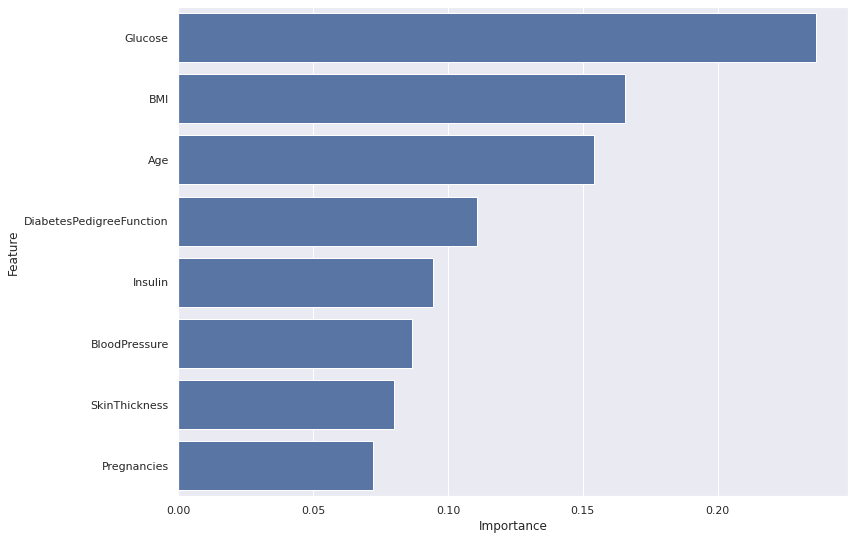

In [ ]:
# Use the importance() function to determine which variables are most important.
plot_df = pd.DataFrame({'Feature': ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'], 'Importance': rf_cls.feature_importances_})
plt.figure(figsize=(12,9))
sns.barplot(x='Importance', y='Feature', data=plot_df.sort_values('Importance', ascending=False),
            color='b')

In [ ]:
!python --version

Python 3.8.16
